# NBA All-Star Weekend Challenge

Your task...answer the following questions given the dataset given about the NBA All-Star Game from the year 2000 - 2016

Become more familiar with the dataset <a href="https://www.kaggle.com/fmejia21/nba-all-star-game-20002016">here</a>

Once completed, commit this notebook to github and submit the link to the google classroom assignment.

<a href="https://classroom.google.com/u/2/c/NDc4MzEzMjI5Nzla/a/NTE3OTYxNzM2OTNa/details">Google Classroom</a>

# What is the average weight of all players who played during this time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_p = pd.read_csv('NBA All Stars 2000-2016 - Sheet1.csv')
df_p.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States


In [3]:
df_p.dtypes

Year                 int64
Player              object
Pos                 object
HT                  object
WT                   int64
Team                object
Selection Type      object
NBA Draft Status    object
Nationality         object
dtype: object

In [4]:
from statistics import mean
avg_wt = round(mean(list(df_p.WT)),1)
print(f"The average weight of NBA all-stars from 2000-2016 is {avg_wt} lbs.")

The average weight of NBA all-stars from 2000-2016 is 228.8 lbs.


# What team is represented the most during this time?

In [5]:
teams = df_p.groupby('Team').count()
teams.max()

Year                28
Player              28
Pos                 28
HT                  28
WT                  28
Selection Type      28
NBA Draft Status    28
Nationality         28
dtype: int64

In [6]:
topt = teams.query('Player == 28')
print(topt.Player)
print(f"The team with the most all-stars between 2000 and 2016 is the Miami Heat with 28 players.")

Team
Miami Heat    28
Name: Player, dtype: int64
The team with the most all-stars between 2000 and 2016 is the Miami Heat with 28 players.


# What draft class is represeted the most during this time?

In [7]:
df_p["NBA Draft Status"].astype(str)
draft = df_p["NBA Draft Status"].str.split(" Rnd ")
draft_list = draft.to_list()
names = ["year", "round"]
df_draft = pd.DataFrame(draft_list, columns=names)
class_count = df_draft.groupby('year').count()
class_count


,round
year,
1984,2
1985,2
1987,1
1988,1
1989,1
1990,4
1991,2
1992,11
1993,6


In [8]:
class_count.max()

round    59
dtype: int64

In [9]:
df_p.rename(columns={'NBA Draft Status': 'draft_status'}, inplace=True)

In [10]:
df_p.query("draft_status == '1996 NBA Draft, Undrafted'")

,Year,Player,Pos,HT,WT,Team,Selection Type,draft_status,Nationality
309,2005,Ben Wallace,FC,6-9,240,Detroit Pistons,Eastern All-Star Coaches Selection,"1996 NBA Draft, Undrafted",United States
334,2004,Ben Wallace,FC,6-9,240,Detroit Pistons,Eastern All-Star Coaches Selection,"1996 NBA Draft, Undrafted",United States
348,2003,Ben Wallace,FC,6-9,240,Detroit Pistons,Eastern All-Star Fan Vote Selection,"1996 NBA Draft, Undrafted",United States
360,2002,Ben Wallace,FC,6-9,240,Detroit Pistons,Eastern All-Star Fan Vote Selection,"1996 NBA Draft, Undrafted",United States


In [11]:
topc = class_count.query('round == 59')
print(topc.round)
print(f"The draft class with the most all-star game representation between 2000 and 2016 is the class of 1996 with 59 appearances. Additionally, 1 undrafted player from 1996, Ben Wallace, went to the all star game 4 times.")

<bound method DataFrame.round of       round
year       
1996     59>
The draft class with the most all-star game representation between 2000 and 2016 is the class of 1996 with 59 appearances. Additionally, 1 undrafted player from 1996, Ben Wallace, went to the all star game 4 times.


# Are foriegn players more prevalent in the All-Star Game during this time?

In [12]:
nat = df_p.groupby('Nationality')['Player'].count()
nat

Nationality
Argentina                              2
Canada                                 1
Canada\nSouth Africa                   8
China                                  8
Democratic Republic of the Congo       2
Dominican Republic\nUnited States      4
England\nSouth Sudan                   2
France                                 6
France\nUnited States                  2
Germany                               13
Germany\nUnited States                 2
Greece\nNigeria                        1
Lithuania                              2
Russia                                 1
Serbia                                 1
Serbia\nGreece                         3
Spain                                  9
Turkey                                 1
United States                        365
United States\nAustralia               4
United States\nGermany                 1
United States\nSpain                   1
Name: Player, dtype: int64

In [13]:
df_p['Nationality'].astype(str)
du_nat = df_p[df_p['Nationality'].str.contains('\n')]
du_nat


,Year,Player,Pos,HT,WT,Team,Selection Type,draft_status,Nationality
12,2016,Kyrie Irving,G,6-3,193,Cleveland Cavaliers,Eastern All-Star Fan Vote Selection,2011 Rnd 1 Pick 1,United States\nAustralia
15,2016,Giannis Antetokounmpo,F,6-11,222,Milwaukee Bucks,Eastern All-Star Fan Vote Selection,2013 Rnd 1 Pick 15,Greece\nNigeria
37,2015,Al Horford,FC,6-10,245,Atlanta Hawks,Eastern All-Star Replacement Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
55,2014,Al Horford,FC,6-10,245,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
59,2014,Kyrie Irving,G,6-3,193,Cleveland Cavaliers,Eastern All-Star Coaches Selection,2011 Rnd 1 Pick 1,United States\nAustralia
93,2013,Kyrie Irving,G,6-3,193,Cleveland Cavaliers,Eastern All-Star Fan Vote Selection,2011 Rnd 1 Pick 1,United States\nAustralia
100,2013,Joakim Noah,FC,6-11,230,Chicago Bulls,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 9,France\nUnited States
122,2012,Joakim Noah,FC,6-11,230,Chicago Bulls,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 9,France\nUnited States
124,2012,Luol Deng,GF,6-9,220,Chicago Bulls,Eastern All-Star Coaches Selection,2004 Rnd 1 Pick 7,England\nSouth Sudan
126,2012,Kyrie Irving,G,6-3,193,Cleveland Cavaliers,Eastern All-Star Coaches Selection,2011 Rnd 1 Pick 1,United States\nAustralia


In [14]:
type(du_nat["Player"])

pandas.core.series.Series

In [15]:
du_nat_num = len(du_nat["Player"].unique())

In [16]:
du_app = du_nat.Player.count()

In [17]:
print(f"{du_nat_num} players were dual national and appeared {du_app} times.")

10 players were dual national and appeared 28 times.


In [18]:
df1 = du_nat.copy()
df2 = du_nat.copy()

In [19]:
df1["Nationality"] = df1["Nationality"].apply(lambda x: x.split('\n')[0])
df2["Nationality"] = df2["Nationality"].apply(lambda x: x.split('\n')[1])

In [20]:
du_nat.index

Int64Index([ 12,  15,  37,  55,  59,  93, 100, 122, 124, 126, 137, 151, 175,
            185, 191, 204, 232, 233, 263, 265, 287, 321, 344, 380, 383, 404,
            407, 408],
           dtype='int64')

In [21]:
df_nat = df_p.copy()
df_nat.drop(du_nat.index, inplace=True)
df_nat = df_nat.append(df1.append(df2), ignore_index=True)

In [22]:
df_nat[df_nat['Nationality'].str.contains("\n")]

,Year,Player,Pos,HT,WT,Team,Selection Type,draft_status,Nationality


In [23]:
nat2 = df_nat.groupby('Nationality')['Player'].count()
nat2

Nationality
Argentina                             2
Australia                             4
Canada                                9
China                                 8
Democratic Republic of the Congo      2
Dominican Republic                    4
England                               2
France                                8
Germany                              16
Greece                                4
Lithuania                             2
Nigeria                               1
Russia                                1
Serbia                                4
South Africa                          8
South Sudan                           2
Spain                                10
Turkey                                1
United States                       379
Name: Player, dtype: int64

In [24]:
nat3 = nat2.copy()
nat3.drop(labels=['United States'], inplace=True)
nat3

Nationality
Argentina                            2
Australia                            4
Canada                               9
China                                8
Democratic Republic of the Congo     2
Dominican Republic                   4
England                              2
France                               8
Germany                             16
Greece                               4
Lithuania                            2
Nigeria                              1
Russia                               1
Serbia                               4
South Africa                         8
South Sudan                          2
Spain                               10
Turkey                               1
Name: Player, dtype: int64

In [25]:
nat3.sum()

88

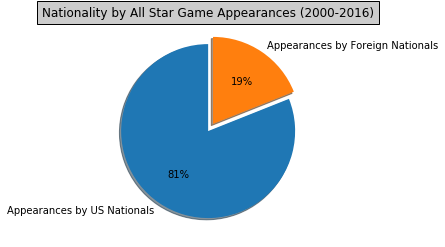

In [30]:
labels = "Appearances by US Nationals", "Appearances by Foreign Nationals"
players = [376, 88]
explode = (0, 0.1)

plt.pie(players, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
plt.title('Nationality by All Star Game Appearances (2000-2016)', bbox={'facecolor':'0.8', 'pad':5});

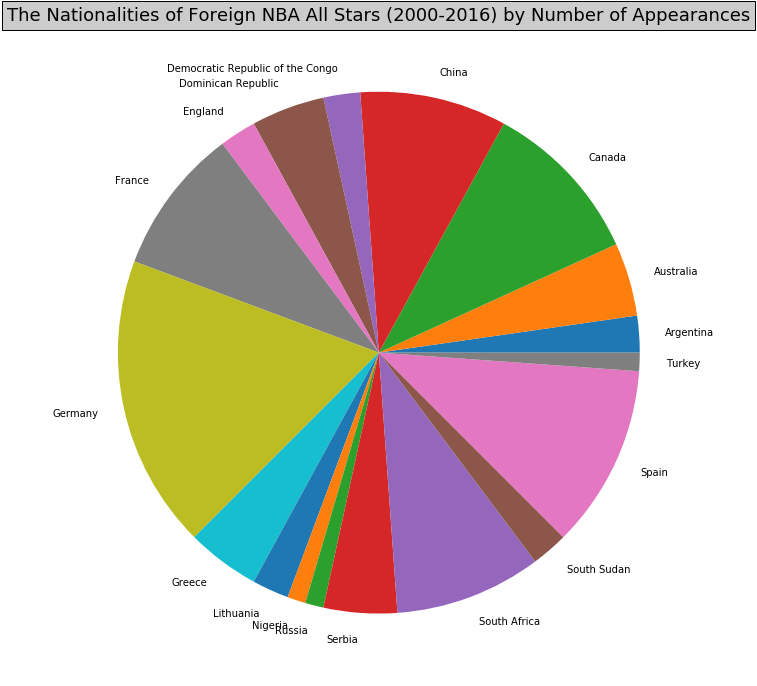

In [46]:
nat3.plot(kind='pie',figsize=(15, 12))
plt.title('The Nationalities of Foreign NBA All Stars (2000-2016) by Number of Appearances', fontsize=18,  bbox={'facecolor':'0.8', 'pad':5})
# plt.arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
plt.axis('off');

In [52]:
nat5 = df_nat.groupby('Nationality')['Player'].nunique()
nat5

Nationality
Argentina                             1
Australia                             1
Canada                                2
China                                 1
Democratic Republic of the Congo      1
Dominican Republic                    1
England                               1
France                                2
Germany                               3
Greece                                2
Lithuania                             1
Nigeria                               1
Russia                                1
Serbia                                2
South Africa                          1
South Sudan                           1
Spain                                 3
Turkey                                1
United States                       107
Name: Player, dtype: int64

In [53]:
nat6 = nat5.copy()
nat6.drop(labels=['United States'], inplace=True)
nat6

Nationality
Argentina                           1
Australia                           1
Canada                              2
China                               1
Democratic Republic of the Congo    1
Dominican Republic                  1
England                             1
France                              2
Germany                             3
Greece                              2
Lithuania                           1
Nigeria                             1
Russia                              1
Serbia                              2
South Africa                        1
South Sudan                         1
Spain                               3
Turkey                              1
Name: Player, dtype: int64

In [54]:
nat6.count()

18

In [55]:
type(nat6)

pandas.core.series.Series

In [56]:
nat = pd.DataFrame({
    'labels': ["Appearances by US Nationals", "Appearances by Foreign Nationals"],
    'players': [107, 18]
})

In [57]:
nat.dtypes

labels     object
players     int64
dtype: object

In [58]:
nat.players

0    107
1     18
Name: players, dtype: int64

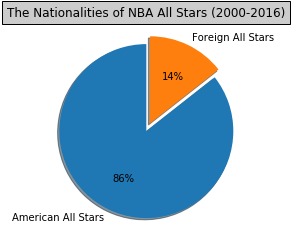

In [61]:
labels = "American All Stars", "Foreign All Stars"
players = [107, 18]
explode = (0, 0.1)

plt.pie(players, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
plt.title('The Nationalities of NBA All Stars (2000-2016)', bbox={'facecolor':'0.8', 'pad':5});



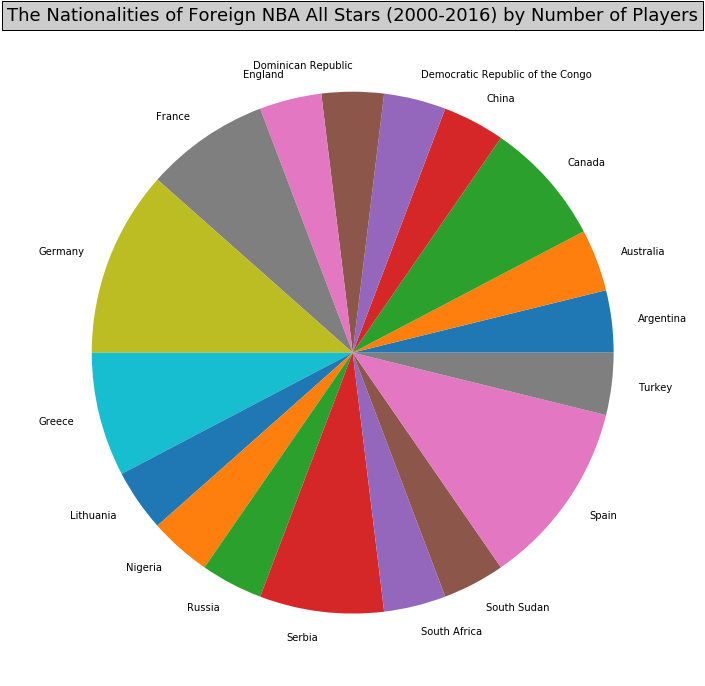

In [60]:
nat6.plot(kind='pie',figsize=(15, 12))
plt.title('The Nationalities of Foreign NBA All Stars (2000-2016) by Number of Players', fontsize=18,  bbox={'facecolor':'0.8', 'pad':5})
# plt.arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
plt.axis('off');

# How often are the Western All-Stars voted in by fans?

In [67]:
df_p['Selection Type'].astype(str)
sel = df_p['Selection Type'].str.split(" All-Star ")
sel_list = sel.to_list()
names = ["conference", "type"]
df_sel = pd.DataFrame(sel_list, columns=names)
sel_count = df_sel.groupby(['conference','type'])['type'].count()
sel_count

conference  type                 
Eastern     Coaches Selection        119
            Fan Vote Selection        85
            Replacement Selection     16
Western     Coaches Selection        119
            Fan Vote Selection        85
            Replacement Selection     15
Name: type, dtype: int64

In the Western Conference, fans selected 85 All-Stars from 2000-2016 while coaches selected 119 All-Stars and 15 All-Stars were replacement selections.


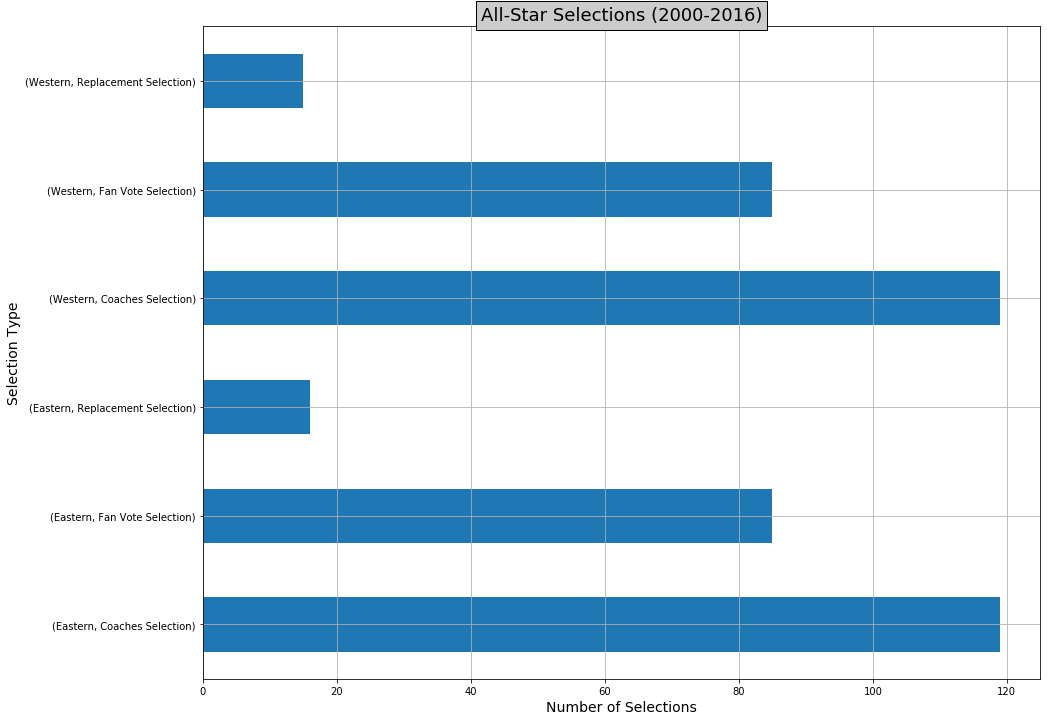

In [73]:
print(f"In the Western Conference, fans selected 85 All-Stars from 2000-2016 while coaches selected 119 All-Stars and 15 All-Stars were replacement selections.")
sel_count.plot(kind='barh',figsize=(15, 12), grid=True)
plt.title('All-Star Selections (2000-2016)', fontsize=18,  bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Selection Type', fontsize=14)
plt.xlabel('Number of Selections', fontsize=14);


# How many times does Steph Curry make the All-Star game during this time period?

In [75]:
df_p.query('Player=="Stephen Curry"')

,Year,Player,Pos,HT,WT,Team,Selection Type,draft_status,Nationality
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
41,2015,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
63,2014,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
87,2013,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States


In [78]:
sc = len(df_p.query('Player=="Stephen Curry"'))
print(f'Steph Curry was in {sc} All-Star games between 2000-2016')

Steph Curry was in 4 All-Star games between 2000-2016


# How many Shooting Gaurds have made the All-Star game during this time?

In [80]:
sg = len(df_p.query('Pos=="SG"'))
print(f'{sg} All-Star selections were shooting guards between 2000 and 2016')

57 All-Star selections were shooting guards between 2000 and 2016


# How many Chicago Bulls players have made the All-Star Game during this time period?

In [81]:
bulls = len(df_p.query('Team=="Chicago Bulls"'))
print(f'{bulls} All-Star selections were Chicago Bulls between 2000 and 2016')

12 All-Star selections were Chicago Bulls between 2000 and 2016
